In [2]:
import pandas
%pylab inline

import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

Populating the interactive namespace from numpy and matplotlib


In [3]:
dataset = pandas.read_csv('dataset/Lista-4/dataset.csv')

In [4]:
dataset.head()

,N,estado_civil,grau_instrucao,n_filhos,salario,idade_anos,idade_meses,reg_procedencia
0,1,solteiro,ensino fundamental,NaN,4,0,26,interior
1,2,casado,ensino fundamental,1.0,4,56,32,capital
2,3,casado,ensino fundamental,2.0,5,25,36,capital
3,4,solteiro,ensino médio,NaN,5,73,20,outra
4,5,solteiro,ensino fundamental,NaN,6,26,40,outra


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
N                  36 non-null int64
estado_civil       36 non-null object
grau_instrucao     36 non-null object
n_filhos           20 non-null float64
salario            36 non-null int64
idade_anos         36 non-null int64
idade_meses        36 non-null int64
reg_procedencia    36 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 2.3+ KB


In [6]:
dataset.count()

N                  36
estado_civil       36
grau_instrucao     36
n_filhos           20
salario            36
idade_anos         36
idade_meses        36
reg_procedencia    36
dtype: int64

#### 1-Qual o total de pessoas com ensino médio na capital? 

In [7]:
cross = pandas.crosstab(dataset.grau_instrucao, dataset.reg_procedencia)
cross

reg_procedencia,capital,interior,outra
grau_instrucao,,,
ensino fundamental,4,3,5
ensino médio,5,7,6
superior,2,2,2


In [8]:
novo = dataset.loc[dataset['reg_procedencia'] == 'capital'].loc[dataset['grau_instrucao'] == 'ensino médio'].count()
novo.head(1)

N    5
dtype: int64

#### 2-Qual o percentual de pessoas do interior com ensino superior?

In [9]:
#func = apply(lambda x : x * 100 / total)
tab = pandas.crosstab(dataset.grau_instrucao, dataset.reg_procedencia, margins=True, margins_name="Total")
tab

reg_procedencia,capital,interior,outra,Total
grau_instrucao,,,,
ensino fundamental,4,3,5,12
ensino médio,5,7,6,18
superior,2,2,2,6
Total,11,12,13,36


In [10]:
func = lambda x : x * 100 / tab['Total']
tab.apply(func)

reg_procedencia,capital,interior,outra,Total
grau_instrucao,,,,
ensino fundamental,33.333333,25.000000,41.666667,100.0
ensino médio,27.777778,38.888889,33.333333,100.0
superior,33.333333,33.333333,33.333333,100.0
Total,30.555556,33.333333,36.111111,100.0


#### 3-Crie um Stacked Bar Chart para representar a relação entre o grau de instrução e a região de procedência.

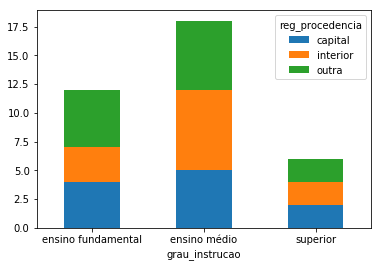

In [11]:
cross.plot(kind='bar', stacked=True, rot=0)

#### 4-Qual a relação entre grau de instruçãoe estado civil?

In [12]:
a = pandas.crosstab(dataset.estado_civil, dataset.grau_instrucao )
a

grau_instrucao,ensino fundamental,ensino médio,superior
estado_civil,,,
casado,5,12,3
solteiro,7,6,3


In [13]:
chi = chi2_contingency(a)
chi

(1.9125000000000003,
 0.3843314298815499,
 2,
 array([[ 6.66666667, 10.        ,  3.33333333],
        [ 5.33333333,  8.        ,  2.66666667]]))

#### 5-Como interpretar o resultado do Teste do Qui-quadrado no item anterior? As variáveis são dependentes ou independentes?

#### 6-Quais são as técnicas usadas para analisar a relação entre:# 2 Variáveis Categóricas         # 2 Variáveis Numéricas                                       # Variável Categórica (Dependente) e Numérica(Independente)  # Variável Categórica (Independente) e Numérica (Dependente) 

#### 7-Explique o que é Correlação e o que é Causalidade.Exemplifique sua resposta.

#### 8-Calcule as medidas de posição da variável salário. 

In [14]:
dataset['salario'].describe()

count    36.000000
mean     10.611111
std       4.574949
min       4.000000
25%       7.000000
50%       9.500000
75%      13.250000
max      23.000000
Name: salario, dtype: float64

#### 9-Calcule as medids de dispersão da variável salário.

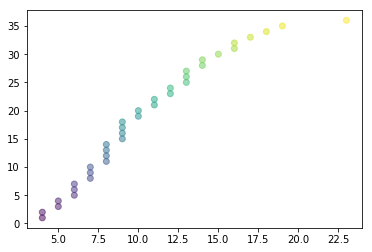

In [18]:
plt.scatter(dataset['salario'], dataset['N'], alpha=0.5, c=dataset['N'])

#### 10-[Opcional]Apresente um relatório final com o resultado da sua análise, explicando em detalhes as relações que você encontrou, comprovando as relações com coeficientes e apresentando um resumo estatístico.